In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los datos de entrada (los valores de los píxeles estarán entre 0 y 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Añadir una dimensión adicional para el canal de color (1, ya que son imágenes en escala de grises)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convertir las etiquetas a valores flotantes para regresión
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Definir el modelo de la red neuronal convolucional para regresión
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Capa convolucional con 32 filtros de 3x3
    MaxPooling2D((2, 2)),  # Capa de MaxPooling con tamaño de 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional con 64 filtros
    MaxPooling2D((2, 2)),  # Segunda capa de MaxPooling
    Flatten(),  # Aplanar la salida para la capa completamente conectada
    Dense(64, activation='relu'),  # Capa totalmente conectada con 64 neuronas
    Dropout(0.5),  # Dropout para reducir el sobreajuste
    Dense(1)  # Capa de salida con una sola neurona para la regresión (valor continuo)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='mean_squared_error')  # Pérdida MSE para problemas de regresión

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - loss: 4.4252 - val_loss: 1.1003
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - loss: 1.9298 - val_loss: 0.8909
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - loss: 1.6568 - val_loss: 0.8349
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - loss: 1.4821 - val_loss: 0.6616
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - loss: 1.3171 - val_loss: 0.7038
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - loss: 1.1796 - val_loss: 0.6595
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - loss: 1.1248 - val_loss: 0.5601
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - loss: 1.0415 - val_loss: 0.5499
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - loss: 0.9998 - val_loss: 0.5065
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - loss: 0.9589 - val_loss: 0.5048
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - loss: 0.8986 - val_loss: 0.5164
Epoch 12/20
938/938 ━━━━━━━━━━

Pérdida en el conjunto de prueba (MSE): 0.45
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


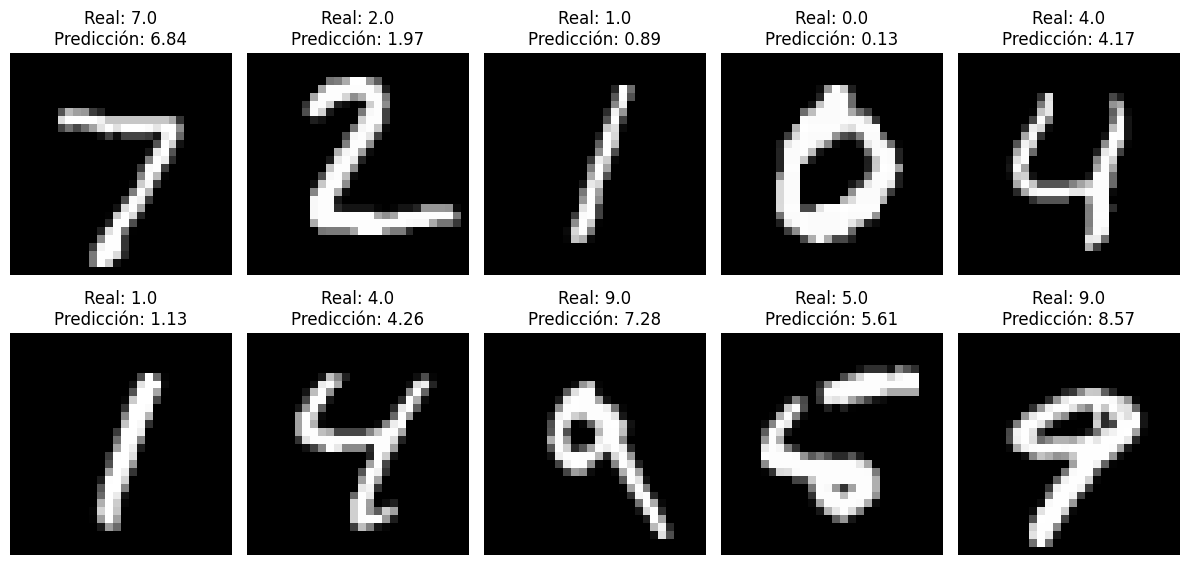

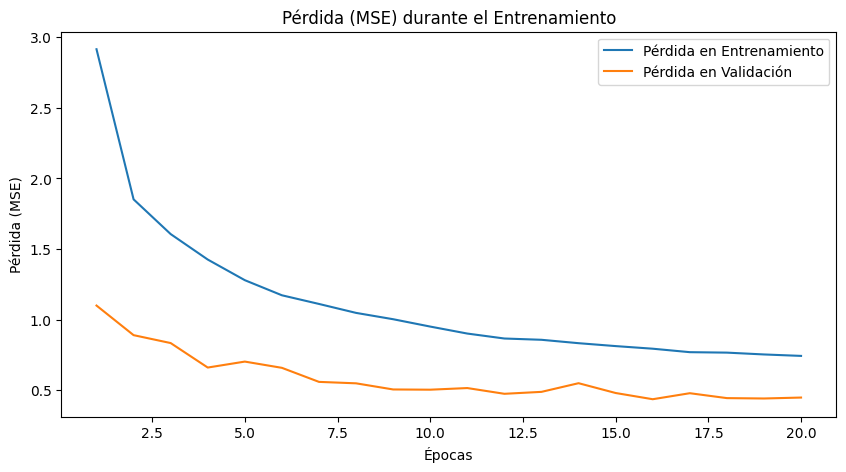

In [4]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba (MSE): {test_loss:.2f}")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar los valores reales vs los valores predichos para algunas muestras
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_test[i]}\nPredicción: {y_pred[i][0]:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Graficar la pérdida durante el entrenamiento
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida (MSE) durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()